<a href="https://colab.research.google.com/github/Harry-jain/AI_KA_HAI/blob/main/Main_URL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

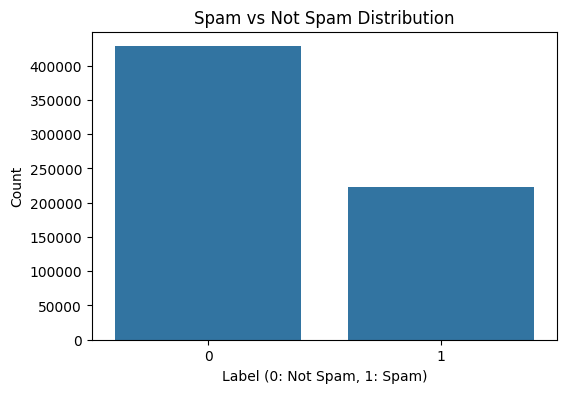

✅ Cleaned dataset saved as 'cleaned_dataset.csv'
✅ TF-IDF vectorization complete.
Training data shape: (520952, 1000)
Test data shape: (130239, 1000)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/7
26048/26048 ━━━━━━━━━━━━━━━━━━━━ 101s 4ms/step - accuracy: 0.9283 - loss: 0.1913 - val_accuracy: 0.9465 - val_loss: 0.1463
Epoch 2/7
26048/26048 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - accuracy: 0.9464 - loss: 0.1441 - val_accuracy: 0.9478 - val_loss: 0.1433
Epoch 3/7
26048/26048 ━━━━━━━━━━━━━━━━━━━━ 136s 3ms/step - accuracy: 0.9492 - loss: 0.1378 - val_accuracy: 0.9472 - val_loss: 0.1395
Epoch 4/7
26048/26048 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - accuracy: 0.9495 - loss: 0.1360 - val_accuracy: 0.9489 - val_loss: 0.1371
Epoch 5/7
26048/26048 ━━━━━━━━━━━━━━━━━━━━ 91s 4ms/step - accuracy: 0.9502 - loss: 0.1349 - val_accuracy: 0.9491 - val_loss: 0.1375
Epoch 6/7
26048/26048 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - accuracy: 0.9515 - loss: 0.1306 - val_accuracy: 0.9500 - val_loss: 0.1354
Epoch 7/7
26048/26048 ━━━━━━━━━━━━━━━━━━━━ 94s 4ms/step - accuracy: 0.9519 - loss: 0.1297 - val_accuracy: 0.9498 - val_loss: 0.1347
Restoring model weights from the end of the best epoch: 6.
✅ Test Accuracy

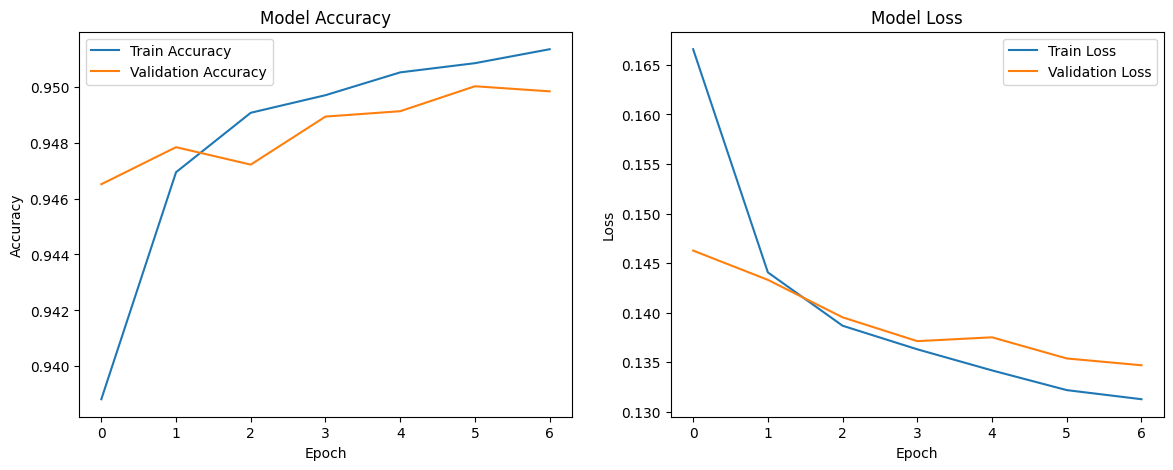

✅ Model saved to: /content/spam_url_model.h5


In [ ]:
# -----------------------------------------------
# 1. Load & Clean Dataset
# -----------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load dataset
file_path = "/content/malicious_phish.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Convert 'type' column into binary classification (1: Spam, 0: Not Spam)
df['label'] = df['type'].apply(lambda x: 1 if x in ['phishing', 'defacement', 'malware'] else 0)

# Keep only necessary columns
df_cleaned = df[['url', 'label']]

# Display class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df_cleaned['label'])
plt.title('Spam vs Not Spam Distribution')
plt.xlabel('Label (0: Not Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()

# Save cleaned dataset
df_cleaned.to_csv("cleaned_dataset.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_dataset.csv'")

# -----------------------------------------------
# 2. Data Preprocessing
# -----------------------------------------------
# Extract features and labels
X = df_cleaned['url']
y = df_cleaned['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization (limits features to reduce memory usage)
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Convert sparse matrices to dense arrays
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

print("✅ TF-IDF vectorization complete.")
print("Training data shape:", X_train_dense.shape)
print("Test data shape:", X_test_dense.shape)

# -----------------------------------------------
# 3. Build & Train the Neural Network (with Early Stopping)
# -----------------------------------------------
# Define an 8-layer deep learning model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_dense.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),  # 8th layer before output
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping: stop training if accuracy doesn’t improve for 3 epochs
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = model.fit(
    X_train_dense, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]  # Apply early stopping
)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test_dense, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_accuracy:.2f}")

# -----------------------------------------------
# 4. Visualize Training Performance
# -----------------------------------------------
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# -----------------------------------------------
# 5. Save the Model for Future Use
# -----------------------------------------------
model_save_path = "/content/spam_url_model.h5"
model.save(model_save_path)
print(f"✅ Model saved to: {model_save_path}")

# -----------------------------------------------
# 6. Interactive URL Prediction System
# -----------------------------------------------
def predict_url(url_input):
    """ Predict if the given URL is spam or not spam """
    url_list = [url_input]
    url_tfidf = tfidf.transform(url_list)
    url_dense = url_tfidf.toarray()

    # Get prediction probability
    pred_prob = model.predict(url_dense)[0][0]
    prediction = 1 if pred_prob >= 0.5 else 0
    result = "not Spam" if prediction == 1 else "Spam"
    confidence = pred_prob if prediction == 1 else (1 - pred_prob)

    return result, confidence

# Create interactive widgets
url_text = widgets.Text(
    value='',
    placeholder='Paste a URL here',
    description='URL:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%')
)

predict_button = widgets.Button(
    description="Check URL",
    button_style='success'
)

output_area = widgets.Output()

def on_button_clicked(b):
    """ Handle the button click event for URL prediction """
    with output_area:
        clear_output()
        if url_text.value.strip() == "":
            print("❌ Please enter a URL.")
        else:
            result, confidence = predict_url(url_text.value.strip())
            print(f"✅ Prediction: {result}")
            print(f"🔹 Confidence: {confidence*100:.1f}%")

predict_button.on_click(on_button_clicked)

# Display the interactive widget
display(widgets.VBox([url_text, predict_button, output_area]))


In [ ]:
# -----------------------------------------------
# 6. Interactive URL Prediction System
# -----------------------------------------------
def predict_url(url_input):
    """ Predict if the given URL is spam or not spam """
    url_list = [url_input]
    url_tfidf = tfidf.transform(url_list)
    url_dense = url_tfidf.toarray()

    # Get prediction probability
    pred_prob = model.predict(url_dense)[0][0]
    prediction = 1 if pred_prob >= 0.5 else 0
    result = "Spam" if prediction == 1 else "Not Spam"
    confidence = pred_prob if prediction == 1 else (1 - pred_prob)

    return result, confidence

# Create interactive widgets
url_text = widgets.Text(
    value='',
    placeholder='Paste a URL here',
    description='URL:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='80%')
)

predict_button = widgets.Button(
    description="Check URL",
    button_style='success'
)

output_area = widgets.Output()

def on_button_clicked(b):
    """ Handle the button click event for URL prediction """
    with output_area:
        clear_output()
        if url_text.value.strip() == "":
            print("❌ Please enter a URL.")
        else:
            result, confidence = predict_url(url_text.value.strip())
            print(f"✅ Prediction: {result}")
            print(f"🔹 Confidence: {confidence*100:.1f}%")

predict_button.on_click(on_button_clicked)

# Display the interactive widget
display(widgets.VBox([url_text, predict_button, output_area]))